<a href="https://colab.research.google.com/github/jvallalta/ia3/blob/main/CNN_MNIST_basic_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de uso de CNN
# en los datos de MNIST

leemos los datos

In [1]:
from keras.datasets import mnist

# descargamos separados en entrenamiento y tes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# tamaño de los datos
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Vemos una imagen

5


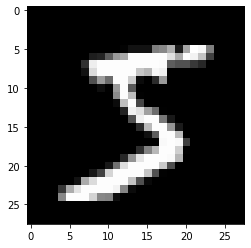

In [3]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0,:,:],cmap='gray')

# Mostramos la etiqueta de la imagen
print(y_train[0])

Reordenamos los datos para que tengan 
(Nº muestras, alto, lado, canales)

In [4]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Separamos train y test

In [5]:
X_train = X_train[0:1000,:,:,:]
X_test = X_test[0:1000,:,:,:]
y_train = y_train[0:1000]
y_test = y_test[0:1000]

In [6]:
print(X_train.shape)
print(y_train.shape)

(1000, 28, 28, 1)
(1000,)


Hacemos el one-hot encoding a las salidas

In [7]:
from keras.utils import to_categorical

# me guardo los y_train antes de hacer el one-hot
y_train_old = y_train

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train.shape)

(1000, 10)


In [10]:

y_train.dtype

dtype('float32')

In [11]:
# Lo que antes era 
print(y_train_old[0,])
# Ahora es
print(y_train[0,:])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Definimos el modelo

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization

# Usamos un modelo secuencial
model = Sequential()

# ponemos dos capas de convolución, una flatten y una densa
model.add(Conv2D(26, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'))
#model.add(Dropout(0.5))
model.add(Conv2D(24, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(32, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 26)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 24)        5640      
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                138250    
Total params: 144,150
Trainable params: 144,150
Non-trainable params: 0
_________________________________________________________________


Se compila el modelo poniendo el optimizador, la funcióón de perdidas y si queremos una métrica

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Entrenamos...

In [19]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 8ms/step - loss: 7.8224 - accuracy: 0.6010 - val_loss: 0.7066 - val_accuracy: 0.7800
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.2474 - accuracy: 0.9270 - val_loss: 0.4781 - val_accuracy: 0.8610
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0612 - accuracy: 0.9850 - val_loss: 0.4374 - val_accuracy: 0.8780
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9990 - val_loss: 0.4522 - val_accuracy: 0.8770
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4583 - val_accuracy: 0.8840
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4595 - val_accuracy: 0.8850
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 9.3834e-04 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.8870
Epoch 8/50
32/32

Evaluamos en test

In [20]:
score = model.evaluate(X_test,y_test)
score

32/32 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.8750


[0.5982553958892822, 0.875]

Ploteamos la evolución

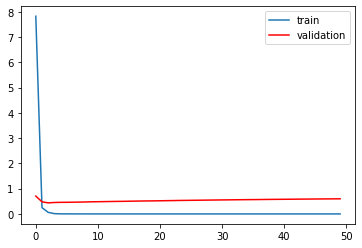

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()


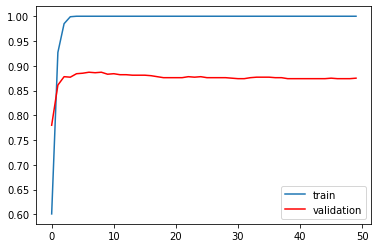

In [22]:
# Evolucion en accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],'r',label='validation')
plt.legend()


# Aplicamos en test

In [23]:
# Predecimos en test
preds_test = model.predict(X_test)

['p(y=0|x) = 0.0000', 'p(y=1|x) = 0.0000', 'p(y=2|x) = 0.0000', 'p(y=3|x) = 1.0000', 'p(y=4|x) = 0.0000', 'p(y=5|x) = 0.0000', 'p(y=6|x) = 0.0000', 'p(y=7|x) = 0.0000', 'p(y=8|x) = 0.0000', 'p(y=9|x) = 0.0000']


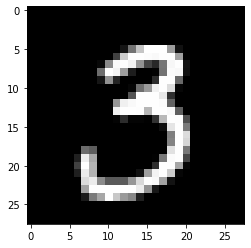

In [24]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 90
# Mostramos la imagen
plt.imshow(np.squeeze(X_test[idx_mostrar,:,:,]),cmap="gray")
# Mostramos las probabilidades que da el modelo a cada clase
print(["p(y=%d|x) = %.4f"%(i,p) for i,p in enumerate(preds_test[idx_mostrar])])